In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

In [6]:
data = pd.read_csv('D:\money\data analytics _ml\AI powered doctor self\AI-powered-doctor-assistant\dataset\Disease_symptom_and_patient_profile_dataset.csv')

In [7]:
data.head()

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
0,Influenza,Yes,No,Yes,Yes,19,Female,Low,Normal,Positive
1,Common Cold,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
2,Eczema,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
3,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive
4,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349 entries, 0 to 348
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Disease               349 non-null    object
 1   Fever                 349 non-null    object
 2   Cough                 349 non-null    object
 3   Fatigue               349 non-null    object
 4   Difficulty Breathing  349 non-null    object
 5   Age                   349 non-null    int64 
 6   Gender                349 non-null    object
 7   Blood Pressure        349 non-null    object
 8   Cholesterol Level     349 non-null    object
 9   Outcome Variable      349 non-null    object
dtypes: int64(1), object(9)
memory usage: 27.4+ KB


In [9]:
data.isnull().sum()

Disease                 0
Fever                   0
Cough                   0
Fatigue                 0
Difficulty Breathing    0
Age                     0
Gender                  0
Blood Pressure          0
Cholesterol Level       0
Outcome Variable        0
dtype: int64

## make copy of original data

In [10]:
data_copy = data.copy()

In [11]:
data_copy.head()

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
0,Influenza,Yes,No,Yes,Yes,19,Female,Low,Normal,Positive
1,Common Cold,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
2,Eczema,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
3,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive
4,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive


In [12]:
data_copy['Cholesterol Level'].unique()

array(['Normal', 'Low', 'High'], dtype=object)

In [13]:
data_copy['Outcome Variable'].unique()

array(['Positive', 'Negative'], dtype=object)

In [14]:
data_copy['Disease'].unique()

array(['Influenza', 'Common Cold', 'Eczema', 'Asthma', 'Hyperthyroidism',
       'Allergic Rhinitis', 'Anxiety Disorders', 'Diabetes',
       'Gastroenteritis', 'Pancreatitis', 'Rheumatoid Arthritis',
       'Depression', 'Liver Cancer', 'Stroke', 'Urinary Tract Infection',
       'Dengue Fever', 'Hepatitis', 'Kidney Cancer', 'Migraine',
       'Muscular Dystrophy', 'Sinusitis', 'Ulcerative Colitis',
       'Bipolar Disorder', 'Bronchitis', 'Cerebral Palsy',
       'Colorectal Cancer', 'Hypertensive Heart Disease',
       'Multiple Sclerosis', 'Myocardial Infarction (Heart...',
       'Urinary Tract Infection (UTI)', 'Osteoporosis', 'Pneumonia',
       'Atherosclerosis', 'Chronic Obstructive Pulmonary...', 'Epilepsy',
       'Hypertension', 'Obsessive-Compulsive Disorde...', 'Psoriasis',
       'Rubella', 'Cirrhosis', 'Conjunctivitis (Pink Eye)',
       'Liver Disease', 'Malaria', 'Spina Bifida', 'Kidney Disease',
       'Osteoarthritis', 'Klinefelter Syndrome', 'Acne', 'Brain Tumor',


## EDA
Check Duplicates

In [15]:
data_copy[data_copy.duplicated()].shape

(49, 10)

In [16]:
data_copy.drop_duplicates(keep='first',inplace=True)

In [17]:
data_copy.shape

(300, 10)

# Explore Data

In [18]:
numerical_feature = [features for features in data_copy.columns if data_copy[features].dtype != 'O']
categorical_feature = [features for features in data_copy.columns if data_copy[features].dtype == 'O']

print('We have {} numerical features: {}'.format(len(numerical_feature),numerical_feature))
print('We have {} Categorical features: {}'.format(len(categorical_feature),categorical_feature))

We have 1 numerical features: ['Age']
We have 9 Categorical features: ['Disease', 'Fever', 'Cough', 'Fatigue', 'Difficulty Breathing', 'Gender', 'Blood Pressure', 'Cholesterol Level', 'Outcome Variable']


In [19]:
for col in categorical_feature:
    print(data_copy[col].value_counts(normalize=True)*100)
    


Disease
Asthma                            5.333333
Osteoporosis                      4.000000
Stroke                            3.666667
Hypertension                      3.333333
Migraine                          3.333333
                                    ...   
Fibromyalgia                      0.333333
Eating Disorders (Anorexia,...    0.333333
Chickenpox                        0.333333
Rabies                            0.333333
Williams Syndrome                 0.333333
Name: proportion, Length: 116, dtype: float64
Fever
No     52.333333
Yes    47.666667
Name: proportion, dtype: float64
Cough
No     53.333333
Yes    46.666667
Name: proportion, dtype: float64
Fatigue
Yes    70.666667
No     29.333333
Name: proportion, dtype: float64
Difficulty Breathing
No     75.666667
Yes    24.333333
Name: proportion, dtype: float64
Gender
Female    50.666667
Male      49.333333
Name: proportion, dtype: float64
Blood Pressure
High      47.666667
Normal    46.333333
Low        6.000000
Name: pro

- Proportion of count data pn numerical columns

C:\Users\ayans\AppData\Local\Temp\ipykernel_18424\2373346936.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x = data_copy[numerical_feature[i]],shade=True,color='r')
c:\Users\ayans\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


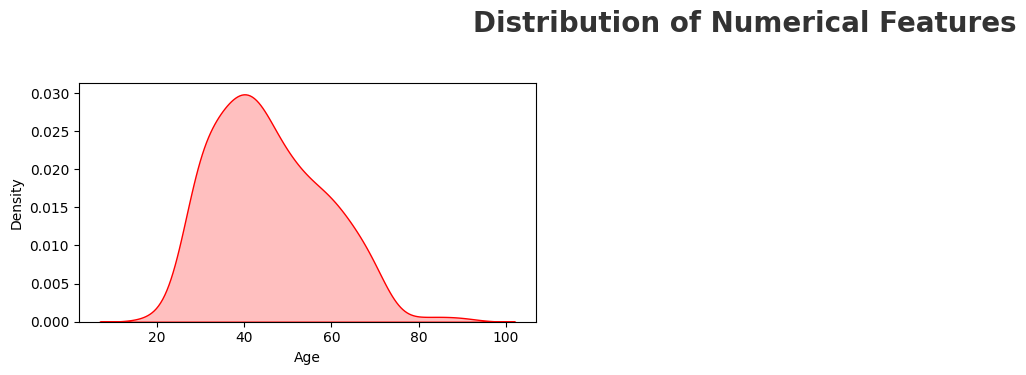

In [20]:
plt.figure(figsize=(15,15))
plt.suptitle('Distribution of Numerical Features',fontsize=20,fontweight='bold',alpha=0.8,y=1.01)

for i, col in enumerate(numerical_feature):
    plt.subplot(5,3,i+1)
    sns.kdeplot(x = data_copy[numerical_feature[i]],shade=True,color='r')
    plt.xlabel(numerical_feature[i])
    plt.tight_layout()

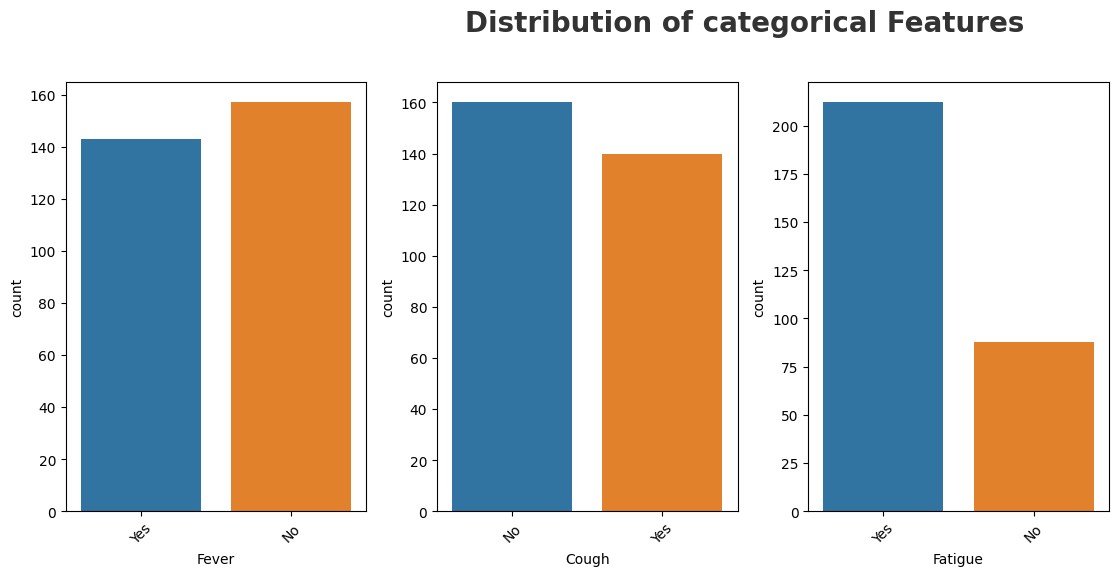

In [21]:
plt.figure(figsize=(15,15))
plt.suptitle('Distribution of categorical Features',fontsize=20,fontweight='bold',alpha=0.8,y=1.01)
category = ['Fever','Cough','Fatigue']

for i, col in enumerate(category):
    plt.subplot(3,4,i+1)
    sns.countplot(x = data_copy[category[i]])
    plt.xlabel(category[i])
    plt.xticks(rotation=45)
    plt.tight_layout()

<Axes: ylabel='count'>

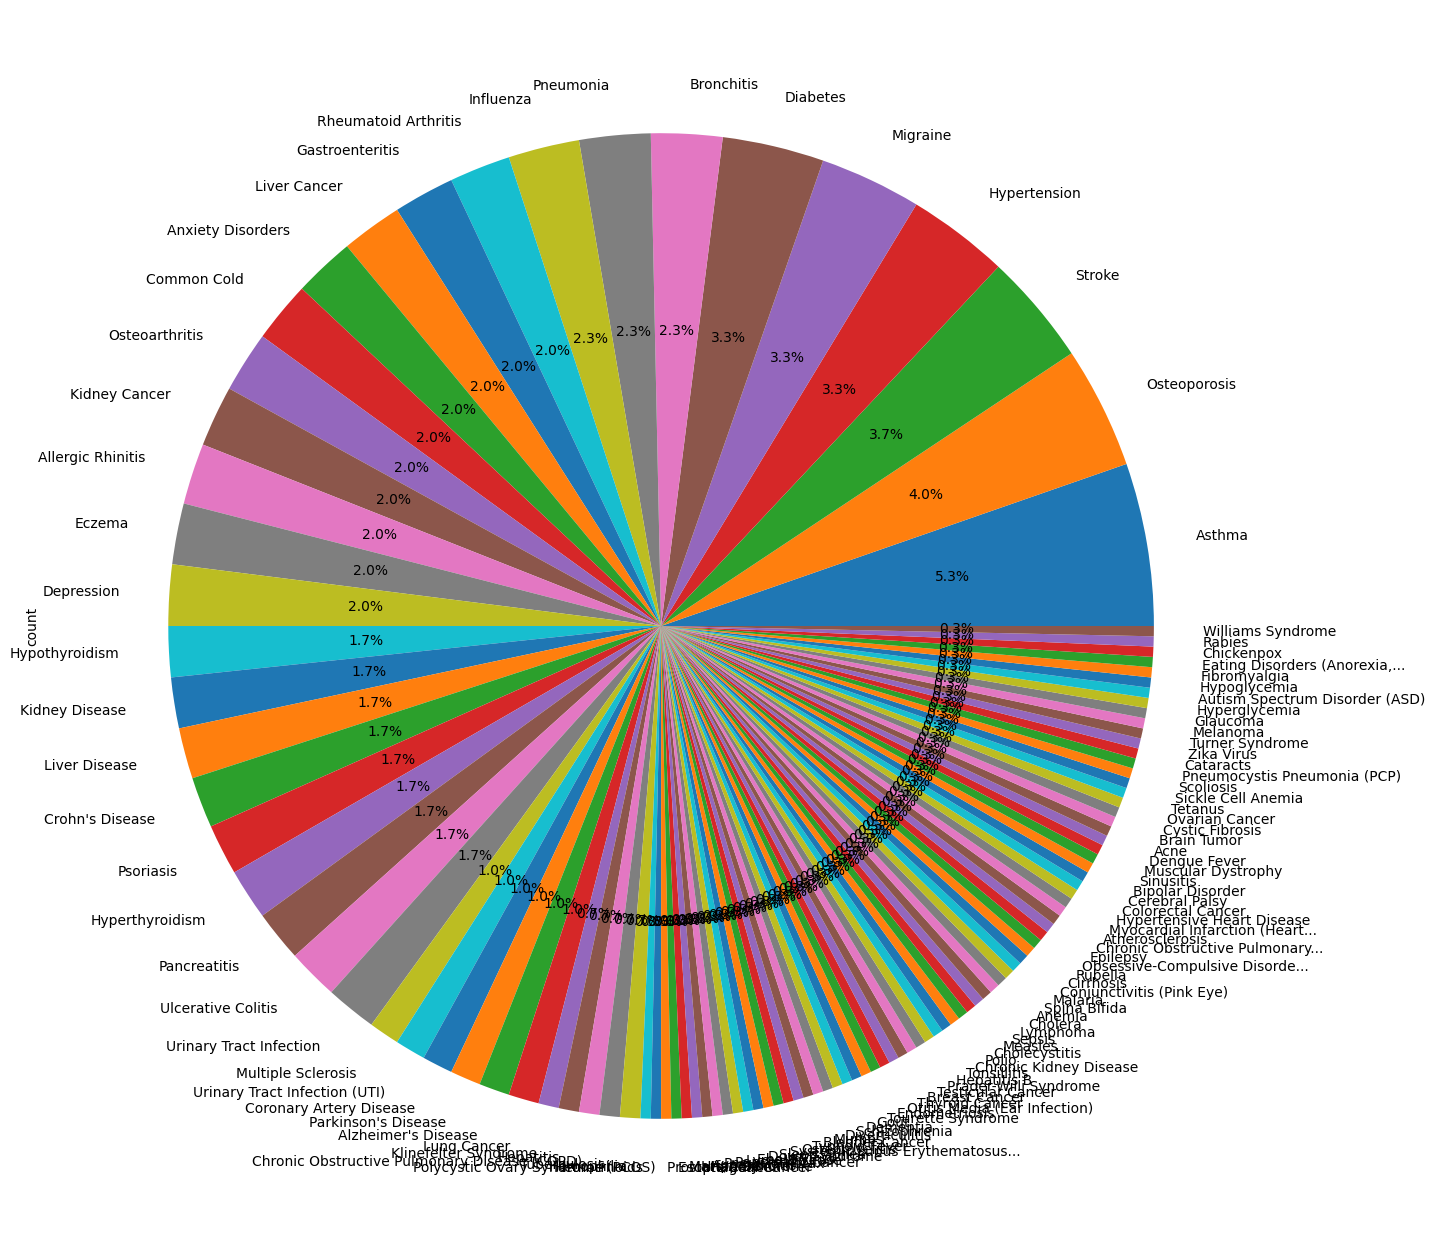

In [22]:
data_copy['Disease'].value_counts().plot.pie(y = data_copy['Disease'],figsize=(28,16),autopct = '%1.1f%%')

In [23]:
category = pd.DataFrame(data_copy['Disease'].value_counts())

In [24]:
category.head(20)

,count
Disease,
Asthma,16
Osteoporosis,12
Stroke,11
Hypertension,10
Migraine,10
Diabetes,10
Bronchitis,7
Pneumonia,7
Influenza,7


## Top 20 categories of diseases 

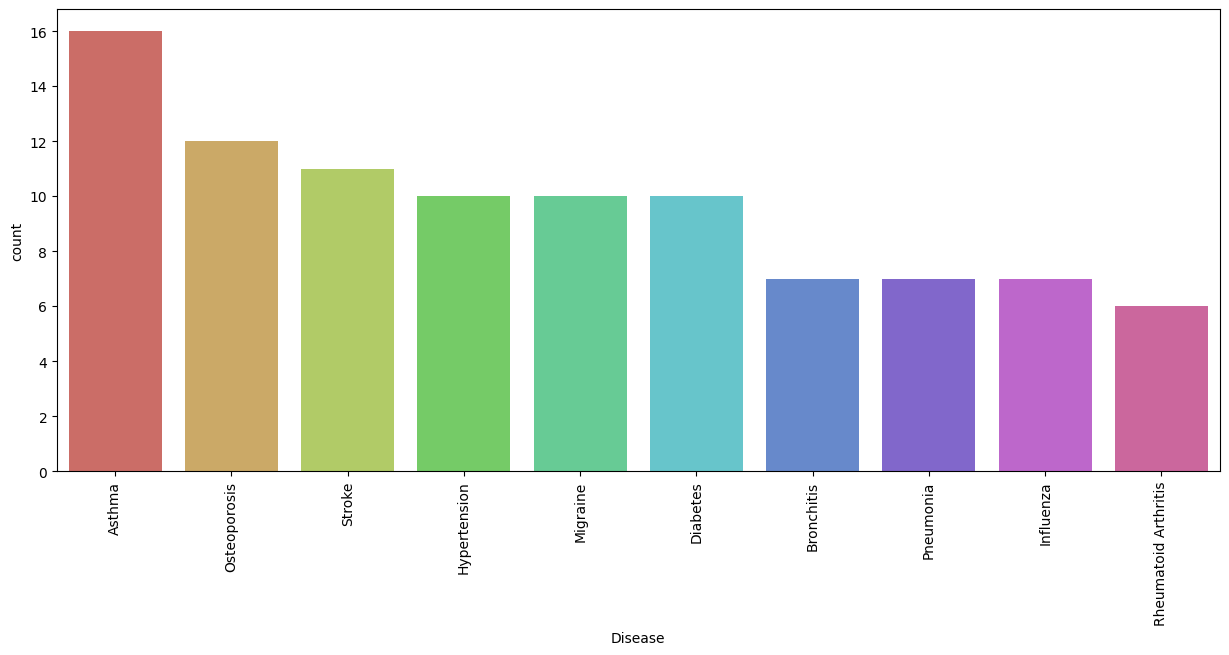

In [25]:
plt.figure(figsize=(15,6))
sns.barplot(x = category.index[:10],y = 'count',data=category[:10],palette='hls')
plt.xticks(rotation=90)
plt.show()

## Encoding

In [26]:
from sklearn.preprocessing import OneHotEncoder,LabelEncoder

In [27]:
numerical_feature = [features for features in data_copy.columns if data_copy[features].dtype != 'O']
categorical_feature = [features for features in data_copy.columns if data_copy[features].dtype == 'O']

print('We have {} numerical features: {}'.format(len(numerical_feature),numerical_feature))
print('We have {} Categorical features: {}'.format(len(categorical_feature),categorical_feature))

We have 1 numerical features: ['Age']
We have 9 Categorical features: ['Disease', 'Fever', 'Cough', 'Fatigue', 'Difficulty Breathing', 'Gender', 'Blood Pressure', 'Cholesterol Level', 'Outcome Variable']


In [28]:
data_copy.head()

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
0,Influenza,Yes,No,Yes,Yes,19,Female,Low,Normal,Positive
1,Common Cold,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
2,Eczema,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
3,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive
5,Eczema,Yes,No,No,No,25,Female,Normal,Normal,Positive


* Disease - Encoded as Label encoder (produces a 1D array (shape (n_samples,)))

* Blood Pressure, cholesterol level - Ordinal Encoding (Low < Normal < High → map to {0,1,2}).

* Other cols - Encoded as OneHotencoder (The result is a sparse matrix by default → that’s why we call .toarray())

In [29]:
encoder = OneHotEncoder()
labeler = LabelEncoder()

In [30]:
cols = ['Fever', 'Cough', 'Fatigue', 'Difficulty Breathing', 
        'Gender', 'Blood Pressure', 'Cholesterol Level', 'Outcome Variable']

In [31]:
encoded = encoder.fit_transform(data_copy[cols]).toarray()
labeled = labeler.fit_transform(data_copy['Disease']).reshape(-1,1)

In [32]:
labeled_df = pd.DataFrame(labeled, columns=['Disease'])

labeled_df.head()

,Disease
0,56
1,24
2,37
3,6
4,37


In [33]:
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(cols))

(encoded_df.head())

,Fever_No,Fever_Yes,Cough_No,Cough_Yes,Fatigue_No,Fatigue_Yes,Difficulty Breathing_No,Difficulty Breathing_Yes,Gender_Female,Gender_Male,Blood Pressure_High,Blood Pressure_Low,Blood Pressure_Normal,Cholesterol Level_High,Cholesterol Level_Low,Cholesterol Level_Normal,Outcome Variable_Negative,Outcome Variable_Positive
0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
2,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
3,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0


## Final Encoded colms (merged_df)

In [34]:
data_copy = data_copy.reset_index(drop=True)
encoded_df = encoded_df.reset_index(drop=True)
labeled_df = labeled_df.reset_index(drop=True)

merged_df = pd.concat([encoded_df,labeled_df], axis=1)
(merged_df)


,Fever_No,Fever_Yes,Cough_No,Cough_Yes,Fatigue_No,Fatigue_Yes,Difficulty Breathing_No,Difficulty Breathing_Yes,Gender_Female,Gender_Male,Blood Pressure_High,Blood Pressure_Low,Blood Pressure_Normal,Cholesterol Level_High,Cholesterol Level_Low,Cholesterol Level_Normal,Outcome Variable_Negative,Outcome Variable_Positive,Disease
0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,56
1,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,24
2,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,37
3,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,6
4,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,106
296,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,114
297,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,101
298,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,101


In [35]:
merged_df.corr()

,Fever_No,Fever_Yes,Cough_No,Cough_Yes,Fatigue_No,Fatigue_Yes,Difficulty Breathing_No,Difficulty Breathing_Yes,Gender_Female,Gender_Male,Blood Pressure_High,Blood Pressure_Low,Blood Pressure_Normal,Cholesterol Level_High,Cholesterol Level_Low,Cholesterol Level_Normal,Outcome Variable_Negative,Outcome Variable_Positive,Disease
Fever_No,1.000000,-1.000000,0.164099,-0.164099,-0.074075,0.074075,0.252019,-0.252019,0.059448,-0.059448,-0.211616,0.128709,0.150658,0.063321,0.051167,-0.094726,0.175894,-0.175894,-0.023099
Fever_Yes,-1.000000,1.000000,-0.164099,0.164099,0.074075,-0.074075,-0.252019,0.252019,-0.059448,0.059448,0.211616,-0.128709,-0.150658,-0.063321,-0.051167,0.094726,-0.175894,0.175894,0.023099
Cough_No,0.164099,-0.164099,1.000000,-1.000000,-0.131100,0.131100,0.201388,-0.201388,-0.040984,0.040984,0.049943,0.039388,-0.068782,0.031250,-0.022272,-0.017978,-0.030323,0.030323,-0.047511
Cough_Yes,-0.164099,0.164099,-1.000000,1.000000,0.131100,-0.131100,-0.201388,0.201388,0.040984,-0.040984,-0.049943,-0.039388,0.068782,-0.031250,0.022272,0.017978,0.030323,-0.030323,0.047511
Fatigue_No,-0.074075,0.074075,-0.131100,0.131100,1.000000,-1.000000,0.075302,-0.075302,0.035341,-0.035341,-0.145805,0.237995,0.032692,-0.074355,-0.019524,0.086678,0.191344,-0.191344,-0.014062
Fatigue_Yes,0.074075,-0.074075,0.131100,-0.131100,-1.000000,1.000000,-0.075302,0.075302,-0.035341,0.035341,0.145805,-0.237995,-0.032692,0.074355,0.019524,-0.086678,-0.191344,0.191344,0.014062
Difficulty Breathing_No,0.252019,-0.252019,0.201388,-0.201388,0.075302,-0.075302,1.000000,-1.000000,0.093021,-0.093021,0.012391,-0.020280,-0.002752,0.094465,-0.069915,-0.052778,0.074605,-0.074605,0.175479
Difficulty Breathing_Yes,-0.252019,0.252019,-0.201388,0.201388,-0.075302,0.075302,-1.000000,1.000000,-0.093021,0.093021,-0.012391,0.020280,0.002752,-0.094465,0.069915,0.052778,-0.074605,0.074605,-0.175479
Gender_Female,0.059448,-0.059448,-0.040984,0.040984,0.035341,-0.035341,0.093021,-0.093021,1.000000,-1.000000,-0.046099,0.024705,0.034407,0.054348,-0.026669,-0.038570,-0.219637,0.219637,0.060488
Gender_Male,-0.059448,0.059448,0.040984,-0.040984,-0.035341,0.035341,-0.093021,0.093021,-1.000000,1.000000,0.046099,-0.024705,-0.034407,-0.054348,0.026669,0.038570,0.219637,-0.219637,-0.060488


# Heatmap - Tells correlation  

* Correlations between Disease and features (Fever_Yes, Cough_Yes, etc.)

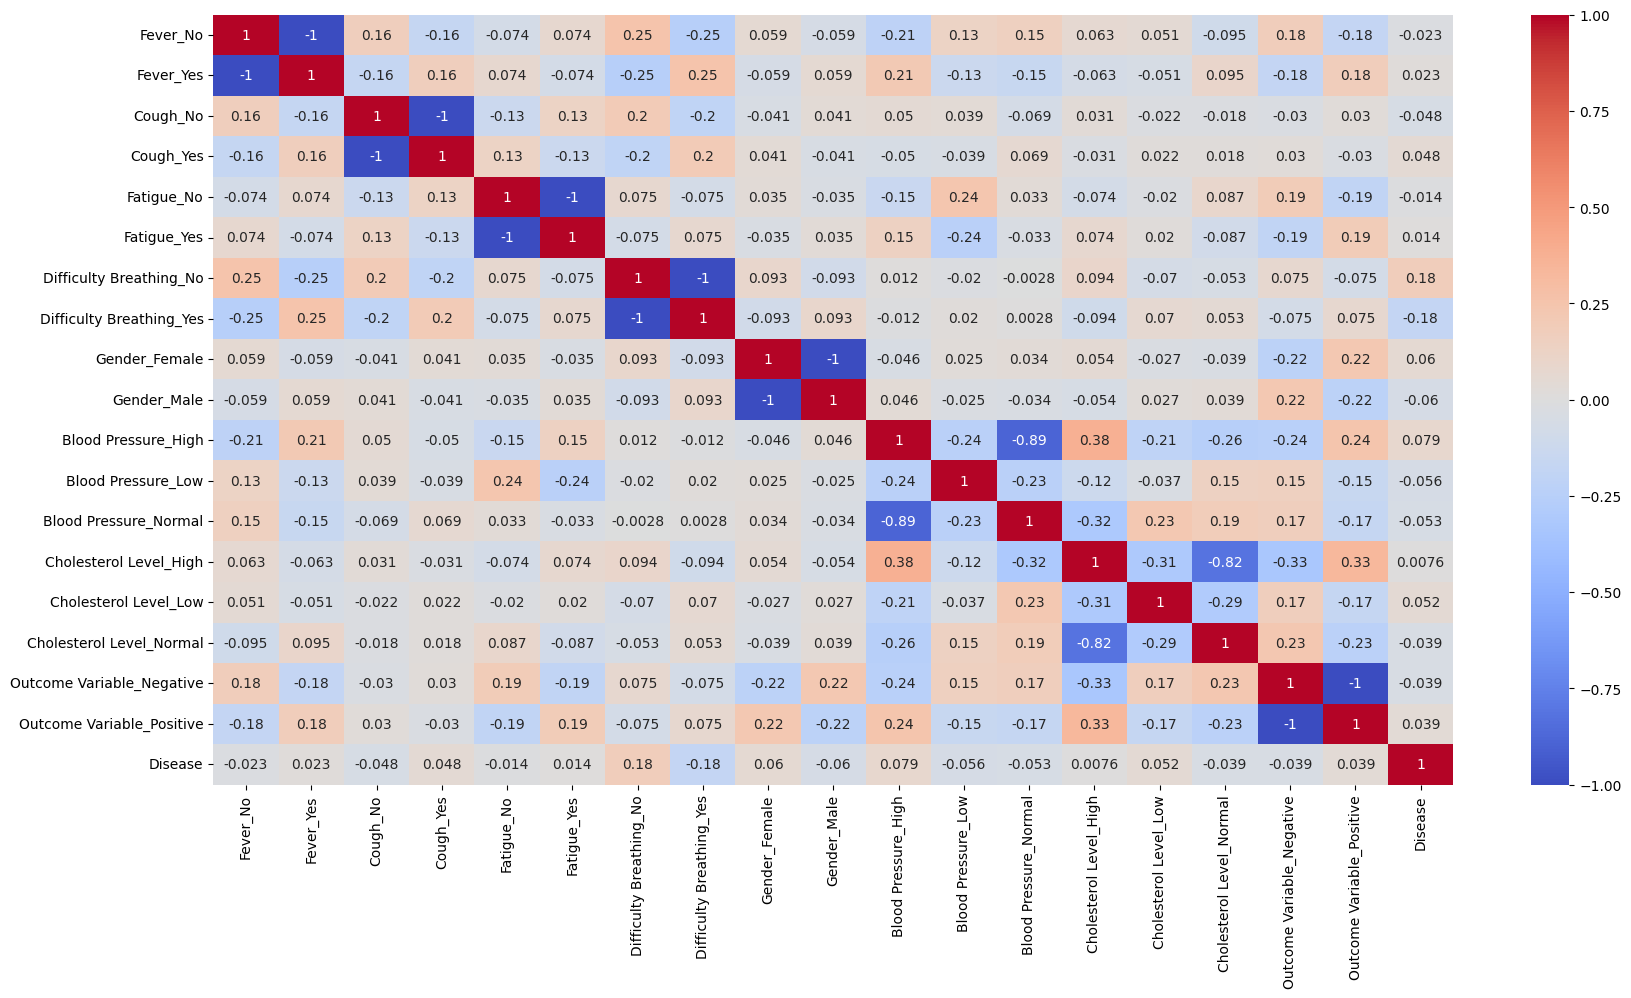

In [36]:
plt.figure(figsize=(20,10))
sns.heatmap(merged_df.corr(), annot=True, cmap='coolwarm')
plt.show()


* Closer to 1 → strong positive relation.

* Closer to -1 → strong negative relation.

* Around 0 → weak or no linear relation.

- This means no single symptom strongly predicts the disease on its own.

- But a combination of symptoms could still predict diseases (which is what ML models do better than correlation).

# Redundant Features

* Fever_No is perfectly negatively correlated with Fever_Yes (–1), they’re duplicates of each other.

* This removes redundancy and avoids confusing the model.
* fever_no = - fever_yes

In [42]:
# Drop all "_No" columns, keep only "_Yes"
cols_to_drop = [col for col in merged_df.columns if col.endswith('_No')]
cleaned_data = merged_df.drop(columns=cols_to_drop)

print("Remaining columns:", cleaned_data.columns)
cleaned_data.head()

Remaining columns: Index(['Fever_Yes', 'Cough_Yes', 'Fatigue_Yes', 'Difficulty Breathing_Yes',
       'Gender_Female', 'Gender_Male', 'Blood Pressure_High',
       'Blood Pressure_Low', 'Blood Pressure_Normal', 'Cholesterol Level_High',
       'Cholesterol Level_Low', 'Cholesterol Level_Normal',
       'Outcome Variable_Negative', 'Outcome Variable_Positive', 'Disease'],
      dtype='object')


,Fever_Yes,Cough_Yes,Fatigue_Yes,Difficulty Breathing_Yes,Gender_Female,Gender_Male,Blood Pressure_High,Blood Pressure_Low,Blood Pressure_Normal,Cholesterol Level_High,Cholesterol Level_Low,Cholesterol Level_Normal,Outcome Variable_Negative,Outcome Variable_Positive,Disease
0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,56
1,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,24
2,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,37
3,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,6
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,37


In [46]:
X = pd.get_dummies(merged_df.drop(columns=['Disease']), drop_first=True)
y = merged_df['Disease']

# ML working
* Use features = symptoms + demographics (Age, Gender, BP, Cholesterol, Outcome Variable).
Target = Disease.